In [1]:

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from src.preprocessing import Preprocessing
from src.visualisation import Visualize

dataPath = "../data/star_classification.csv"

preprocessing = Preprocessing(dataPath)

visualize = Visualize(preprocessing)

# read of the data_csv
preprocessing.read_file()

# we print it here to see what it looks like : 
preprocessing.printFileData()

         obj_ID       alpha      delta         u         g         r  \
0  1.237661e+18  135.689107  32.494632  23.87882  22.27530  20.39501   
1  1.237665e+18  144.826101  31.274185  24.77759  22.83188  22.58444   
2  1.237661e+18  142.188790  35.582444  25.26307  22.66389  20.60976   
3  1.237663e+18  338.741038  -0.402828  22.13682  23.77656  21.61162   
4  1.237680e+18  345.282593  21.183866  19.43718  17.58028  16.49747   

          i         z  run_ID  rerun_ID  cam_col  field_ID   spec_obj_ID  \
0  19.16573  18.79371    3606       301        2        79  6.543777e+18   
1  21.16812  21.61427    4518       301        5       119  1.176014e+19   
2  19.34857  18.94827    3606       301        2       120  5.152200e+18   
3  20.50454  19.25010    4192       301        3       214  1.030107e+19   
4  15.97711  15.54461    8102       301        3       137  6.891865e+18   

    class  redshift  plate    MJD  fiber_ID  
0  GALAXY  0.634794   5812  56354       171  
1  GALAXY  0.77913

In [2]:
# we describe it here
preprocessing.describeData()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

On peut observer que la feature "class" que l'on cherche à prédire ne 
contient que des objects.
Or, pour pouvoir bien analyser, il faudrait que ces features soient 
numériques pour mieux les tester et visualiser. 
Pour cela, nous allons faire un encodage de ce feauture "class"

In [3]:
visualize.preprocessing.encodingFeatures(["class"])

In [5]:
# We recheck if the encoding has worked :
preprocessing.describeData()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  int32  
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int32(1),

And yes, it works because the type of class has changed for int32.

In [6]:
# now we check null and duplicated values of the dataframe
preprocessing.checkNullValues()

Quantity of null values: obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64 

Quantity of duplicated values: 0 


In [7]:
# now we remove all null and duplicatedValues if there are : 
preprocessing.removeAndCleanDataframe()

Print the histogram of the dataframe 


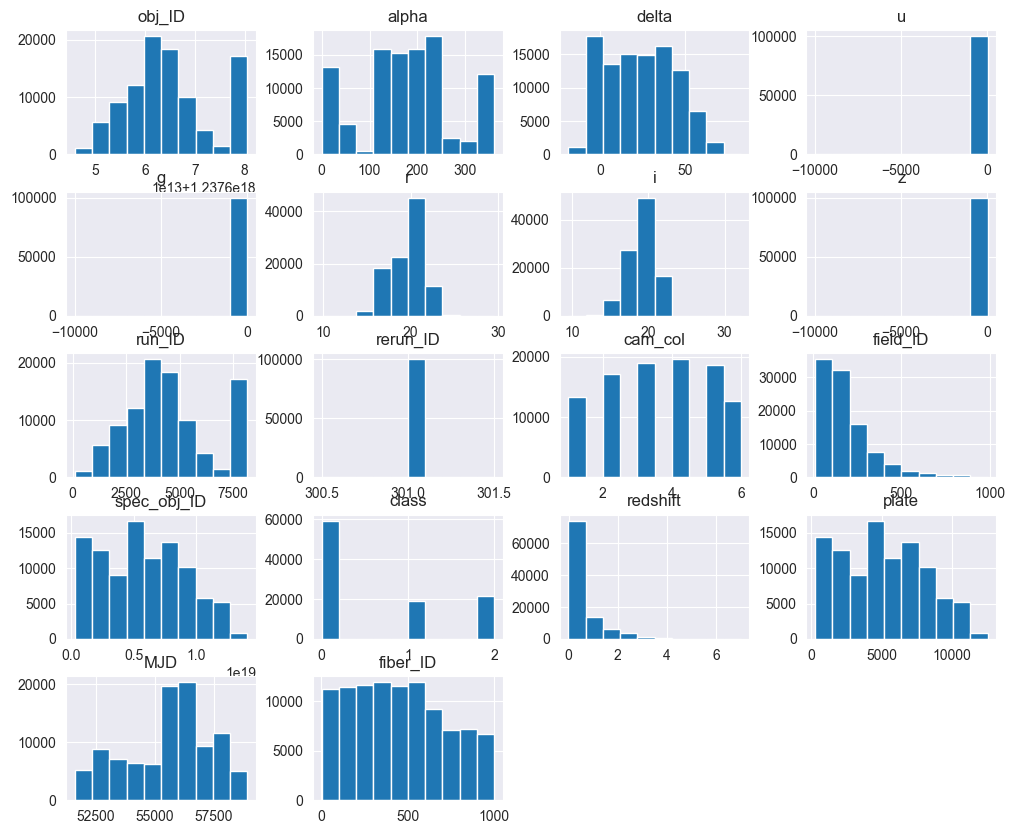

In [8]:
# now we try to visualize the datas : 

visualize.showHistogram()

As we visualize the histogram, we can retrieve two (2) things:

- we can see that data from the obj_ID and run_ID seems to be the same.
- the data of **u** features, the **q** and the **z** look approximatevitely
 the same too


To confirm, what we are saying, we can check the relations between those 
features.

## Preprocessing for features *run_ID*  *obj_ID*

The scatter plot allows us to quickly see whether the two variables have a 
linear (straight line) or non-linear (curve, clusters, etc.) relationship. If
 the points form a straight line or a regular curve, it may indicate a strong
  correlation between the two variables.  
If the points are scattered without any visible pattern, it suggests that 
there is no obvious linear relationship, and the correlation between these 
variables may be weak or non-existent.


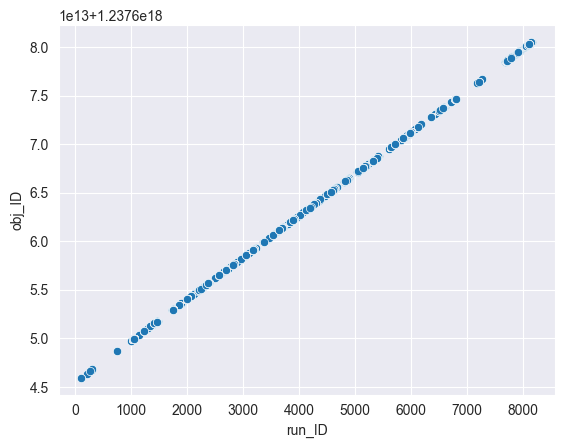

In [10]:
sns.scatterplot(data=preprocessing.df, x='run_ID', y='obj_ID')
plt.show()

So, here we can observe that a linear pattern is formed by the scatterplot of these features.
This suggests that those features have strong correlation.
***Furthermore***, we can try to visualize a line fitted to the scatterplot to 
reinforce our observations.

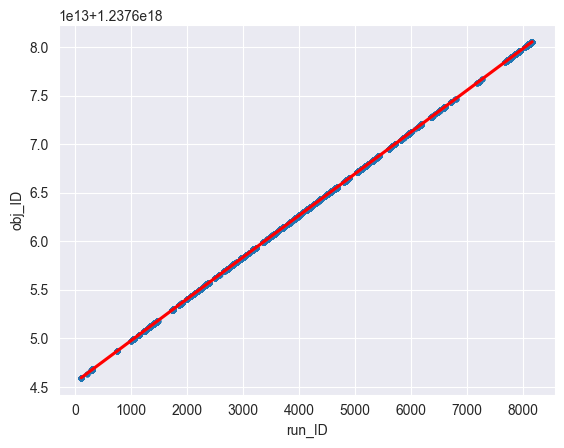

In [14]:
sns.regplot(x='run_ID', y='obj_ID', data=preprocessing.df,
            scatter_kws={'s': 10}, line_kws={'color': 'red'})
plt.show()

To reinforce our observations, we can plot the correlation matrix of these 
features.
The correlation matrix provides a comprehensive view of how the features are 
related to each other, helping us confirm the strength and direction of their
relationships.

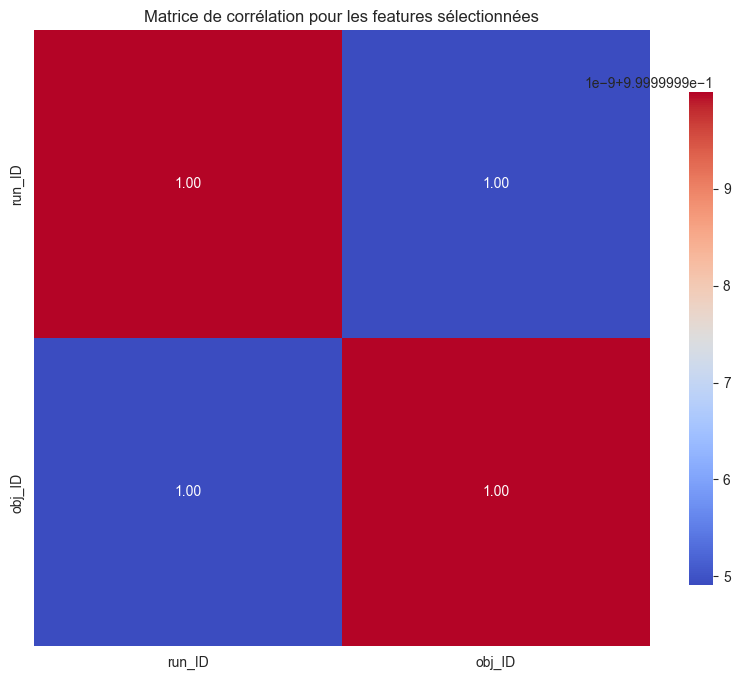

In [9]:
# now a matrix of correlation :
visualize.showCorrelationMatrixForSelectedFeatures(["run_ID", "obj_ID"])

### Conclusion on the correlation of features *obj_ID* and *run_ID*
By plotting the correlation matrix for the features *obj_ID* and *run_ID* we 
observe
values very close to 1 both on and off the diagonal. This indicates a strong 
correlation between these variables, suggesting that they carry redundant 
information.

When deciding which features to keep in a predictive model, one common 
approach is to select the feature that has the highest correlation with the 
target variable, as this feature is more likely to be informative and useful 
for making predictions.
So the one, we are going to use here is **Correlation with the Target 
Variable**.
Basically,for each feature, we calculate the correlation with the target 
variable : the **class** feature we are going to predict. 
*In general*:
- A strong positive correlation means the feature increases as the target 
variable increases.
- A strong negative correlation means the feature decreases as the target 
variable increases.

In [17]:
target_corr = visualize.preprocessing.df[['run_ID', 'obj_ID']].corrwith(visualize.preprocessing.df['class'])
print(target_corr)

run_ID   -0.036014
obj_ID   -0.036012
dtype: float64


#### Very Weak Correlation (Close to 0):
The correlation values for all variables (run_ID, and obj_ID) are very close to
 0. 
This indicates a very weak or nonexistent relationship between each of these 
variables and the target variable class.
Sot that means we can remove those features **run_ID**, and **obj_ID** from our 
data as they are not important enough to make some major changes in our 
predictions later on.

## Preprocessing for features *u*  *g*  *z*

As we have done before for the **run_ID**, and **obj_ID** features, we can 
try to plot a scatter plot to see whether the two variables have a 
linear (straight line) or non-linear (curve, clusters, etc.) relationship.

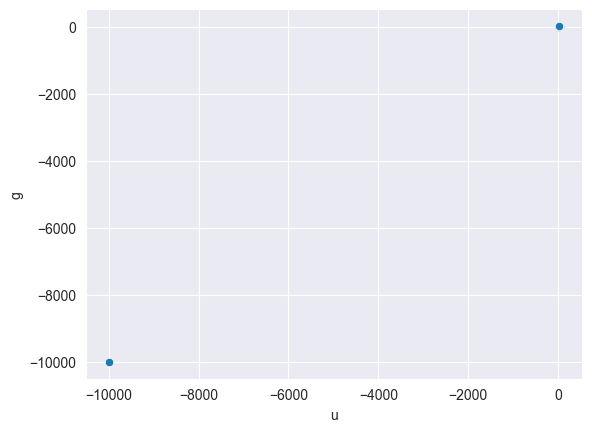

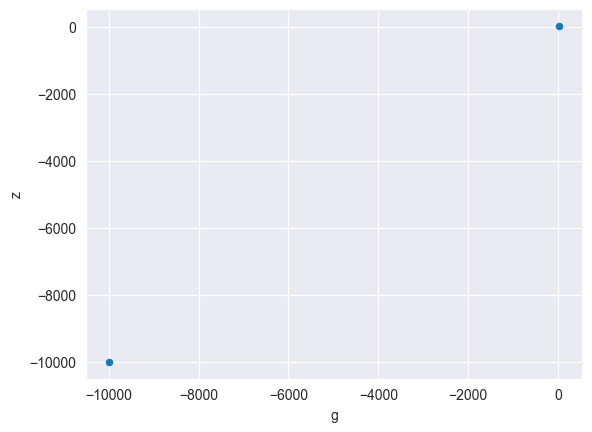

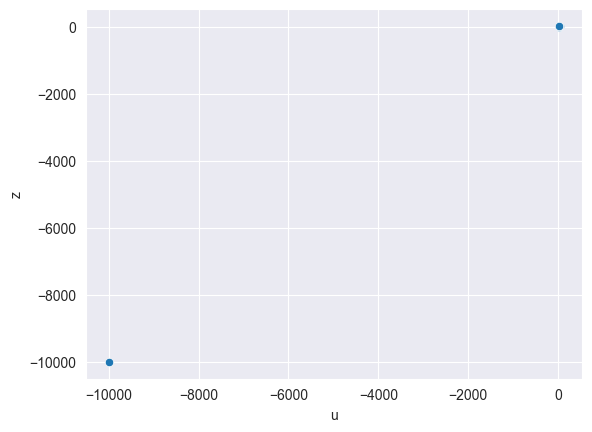

In [18]:
sns.scatterplot(data=preprocessing.df, x='u', y='g')
plt.show()
sns.scatterplot(data=preprocessing.df, x='g', y='z')
plt.show()
sns.scatterplot(data=preprocessing.df, x='u', y='z')
plt.show()

With these plots, we ***can not draw any conclusions about the relationship 
between the features***, as it appears to be a dimensionality issue. The 
presence of only two points on the graph suggests that there may not be 
enough data to properly assess any correlation.
So we can try another approah as before, with ***a matrix of correlation***.

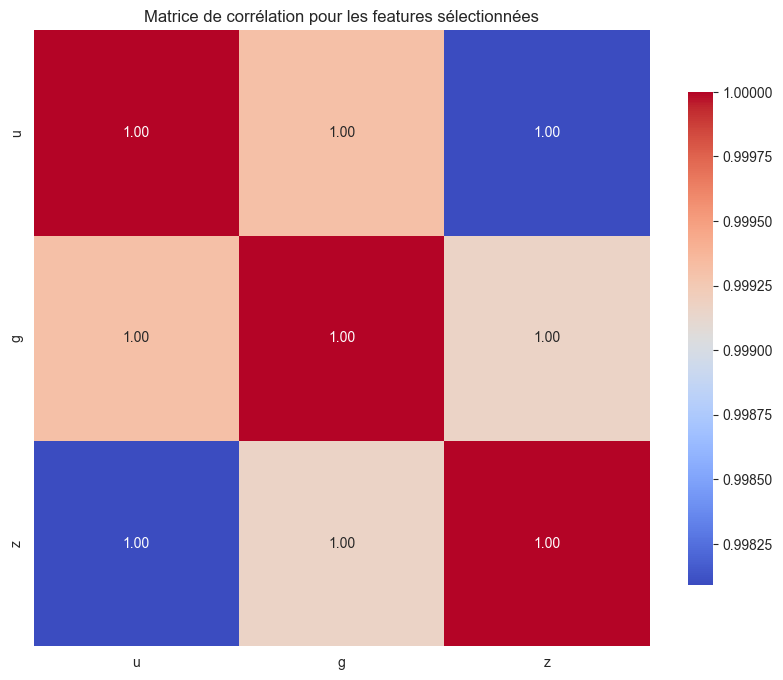

In [11]:
visualize.showCorrelationMatrixForSelectedFeatures(["u", "g", "z"])

### Correlation Matrix Analysis for Features **u** **g** **z**
By plotting the correlation matrix for the features u, g, and z, we observe
values very close to 1 both on and off the diagonal. This indicates a strong 
correlation between these variables, suggesting that they carry redundant 
information.
To reduce dimensionality, it would be beneficial to eliminate two of these 
features or even better all of them. However, the decision on which features to 
retain can be guided by:

- The contextual importance of the features in the model.
For this, we could analyze their variance, preferring the feature with the 
highest variance to retain the most information.
- Their relationship with the target variable.
This can be analyzed by metrics such as correlation with the target variable 
or their importance in a predictive model.

As we have done for the features *obj_ID* and *run_ID*, we can calculate the 

In [16]:
target_corr = (visualize.preprocessing.df[['u', 'g', 'z']].corrwith
               (visualize.preprocessing.df['class']))
print(target_corr)

u   -0.024645
g   -0.020066
z   -0.001614
dtype: float64


#### Very Weak Correlation (Close to 0):
The correlation values for all variables (u, g, and z) are very close to 0. 
This indicates a very weak or nonexistent relationship between each of these 
variables and the target variable class.

#### Signs of Correlations:
The correlations are all negative but very close to 0, which suggests no 
significant or directional relationship between the variables u, g, z, and class.
Sot that means we can remove those features *u* *g* *z* from our data as 
they are not important enough to make some major changes in our predictions 
later on.

### Conclusion
To conclude, we need to remove from our data the (**run_ID** **obj_ID** **u**
 **z** **g**)

#### List of columns to suppress

In [19]:
columns_to_drop = ['run_ID', 'obj_ID', 'u','g','z']

#### We suppress the columns

In [20]:
visualize.preprocessing.df.drop(columns=columns_to_drop, inplace=True)

So here is the final data, we are going to use :

In [21]:
visualize.preprocessing.printFileData()

        alpha      delta         r         i  rerun_ID  cam_col  field_ID  \
0  135.689107  32.494632  20.39501  19.16573       301        2        79   
1  144.826101  31.274185  22.58444  21.16812       301        5       119   
2  142.188790  35.582444  20.60976  19.34857       301        2       120   
3  338.741038  -0.402828  21.61162  20.50454       301        3       214   
4  345.282593  21.183866  16.49747  15.97711       301        3       137   

    spec_obj_ID  class  redshift  plate    MJD  fiber_ID  
0  6.543777e+18      0  0.634794   5812  56354       171  
1  1.176014e+19      0  0.779136  10445  58158       427  
2  5.152200e+18      0  0.644195   4576  55592       299  
3  1.030107e+19      0  0.932346   9149  58039       775  
4  6.891865e+18      0  0.116123   6121  56187       842  


In [22]:
visualize.preprocessing.describeData()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   alpha        100000 non-null  float64
 1   delta        100000 non-null  float64
 2   r            100000 non-null  float64
 3   i            100000 non-null  float64
 4   rerun_ID     100000 non-null  int64  
 5   cam_col      100000 non-null  int64  
 6   field_ID     100000 non-null  int64  
 7   spec_obj_ID  100000 non-null  float64
 8   class        100000 non-null  int32  
 9   redshift     100000 non-null  float64
 10  plate        100000 non-null  int64  
 11  MJD          100000 non-null  int64  
 12  fiber_ID     100000 non-null  int64  
dtypes: float64(6), int32(1), int64(6)
memory usage: 9.5 MB
None
               alpha          delta              r              i  rerun_ID  \
count  100000.000000  100000.000000  100000.000000  100000.000000  100000.0   
mean      177.629117  